# 1 - Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from jax import jit, grad, config
import jaxquantum as jqt
import jaxquantum.devices as jqtd
import jax.numpy as jnp
from tqdm import tqdm
import matplotlib.pyplot as plt

config.update("jax_enable_x64", True)

/opt/miniconda3/envs/jax-framework/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
Ec_q = 0.3
Ej_q = 15

qubit = jqtd.Transmon.create(
    21,
    {"Ec": Ec_q, "Ej": Ej_q},
    N_pre_diag=21,
    basis=jqtd.BasisTypes.charge,
    hamiltonian=jqtd.HamiltonianTypes.full,
)

sc_qubit = jqtd.Transmon.create(
    2*2*5,
    {"Ec": Ec_q, "Ej": Ej_q},
    N_pre_diag=20,
    basis=jqtd.BasisTypes.singlecharge,
    hamiltonian=jqtd.HamiltonianTypes.full,
)

sce_qubit = jqtd.Transmon.create(
    2*2*5,
    {"Ec": Ec_q, "Ej": Ej_q},
    N_pre_diag=20,
    basis=jqtd.BasisTypes.singlecharge_even,
    hamiltonian=jqtd.HamiltonianTypes.full,
)

In [4]:
qubit.original_ops["n"].diag()

Array([-10.+0.j,  -9.+0.j,  -8.+0.j,  -7.+0.j,  -6.+0.j,  -5.+0.j,
        -4.+0.j,  -3.+0.j,  -2.+0.j,  -1.+0.j,   0.+0.j,   1.+0.j,
         2.+0.j,   3.+0.j,   4.+0.j,   5.+0.j,   6.+0.j,   7.+0.j,
         8.+0.j,   9.+0.j,  10.+0.j], dtype=complex128, weak_type=True)

In [5]:
sc_qubit.original_ops["n"].diag()

Array([-10.+0.j,  -9.+0.j,  -8.+0.j,  -7.+0.j,  -6.+0.j,  -5.+0.j,
        -4.+0.j,  -3.+0.j,  -2.+0.j,  -1.+0.j,   0.+0.j,   1.+0.j,
         2.+0.j,   3.+0.j,   4.+0.j,   5.+0.j,   6.+0.j,   7.+0.j,
         8.+0.j,   9.+0.j], dtype=complex128, weak_type=True)

In [6]:
sce_qubit.original_ops["n"].diag()

Array([-20.+0.j, -18.+0.j, -16.+0.j, -14.+0.j, -12.+0.j, -10.+0.j,
        -8.+0.j,  -6.+0.j,  -4.+0.j,  -2.+0.j,   0.+0.j,   2.+0.j,
         4.+0.j,   6.+0.j,   8.+0.j,  10.+0.j,  12.+0.j,  14.+0.j,
        16.+0.j,  18.+0.j], dtype=complex128, weak_type=True)

# 2 - Fixed Frequency Transmon

In [3]:
Ec_q = 0.3
Ej_q = 15

qubit = jqtd.Transmon.create(
    23,
    {"Ec": Ec_q, "Ej": Ej_q},
    N_pre_diag=23,
    basis=jqtd.BasisTypes.charge,
    hamiltonian=jqtd.HamiltonianTypes.full,
)

res = jqtd.Resonator.create(
    23,
    {"Ec": Ec_q, "El": Ej_q},
    N_pre_diag=23,
    basis=jqtd.BasisTypes.fock,
    hamiltonian=jqtd.HamiltonianTypes.full,
)

In [4]:
qubit.eig_systems["vals"]

Array([-12.07703386,  -6.39445819,  -1.05664942,   3.89594699,
         8.34157217,  12.54032139,  14.69273601,  20.71739651,
        20.85721955,  30.96770401,  30.96906144,  43.8623024 ,
        43.8623072 ,  59.28334982,  59.28334983,  77.16881241,
        77.16881241,  97.49262155,  97.49262155, 120.31958198,
       120.31958198, 147.34642113, 147.34642113], dtype=float64)

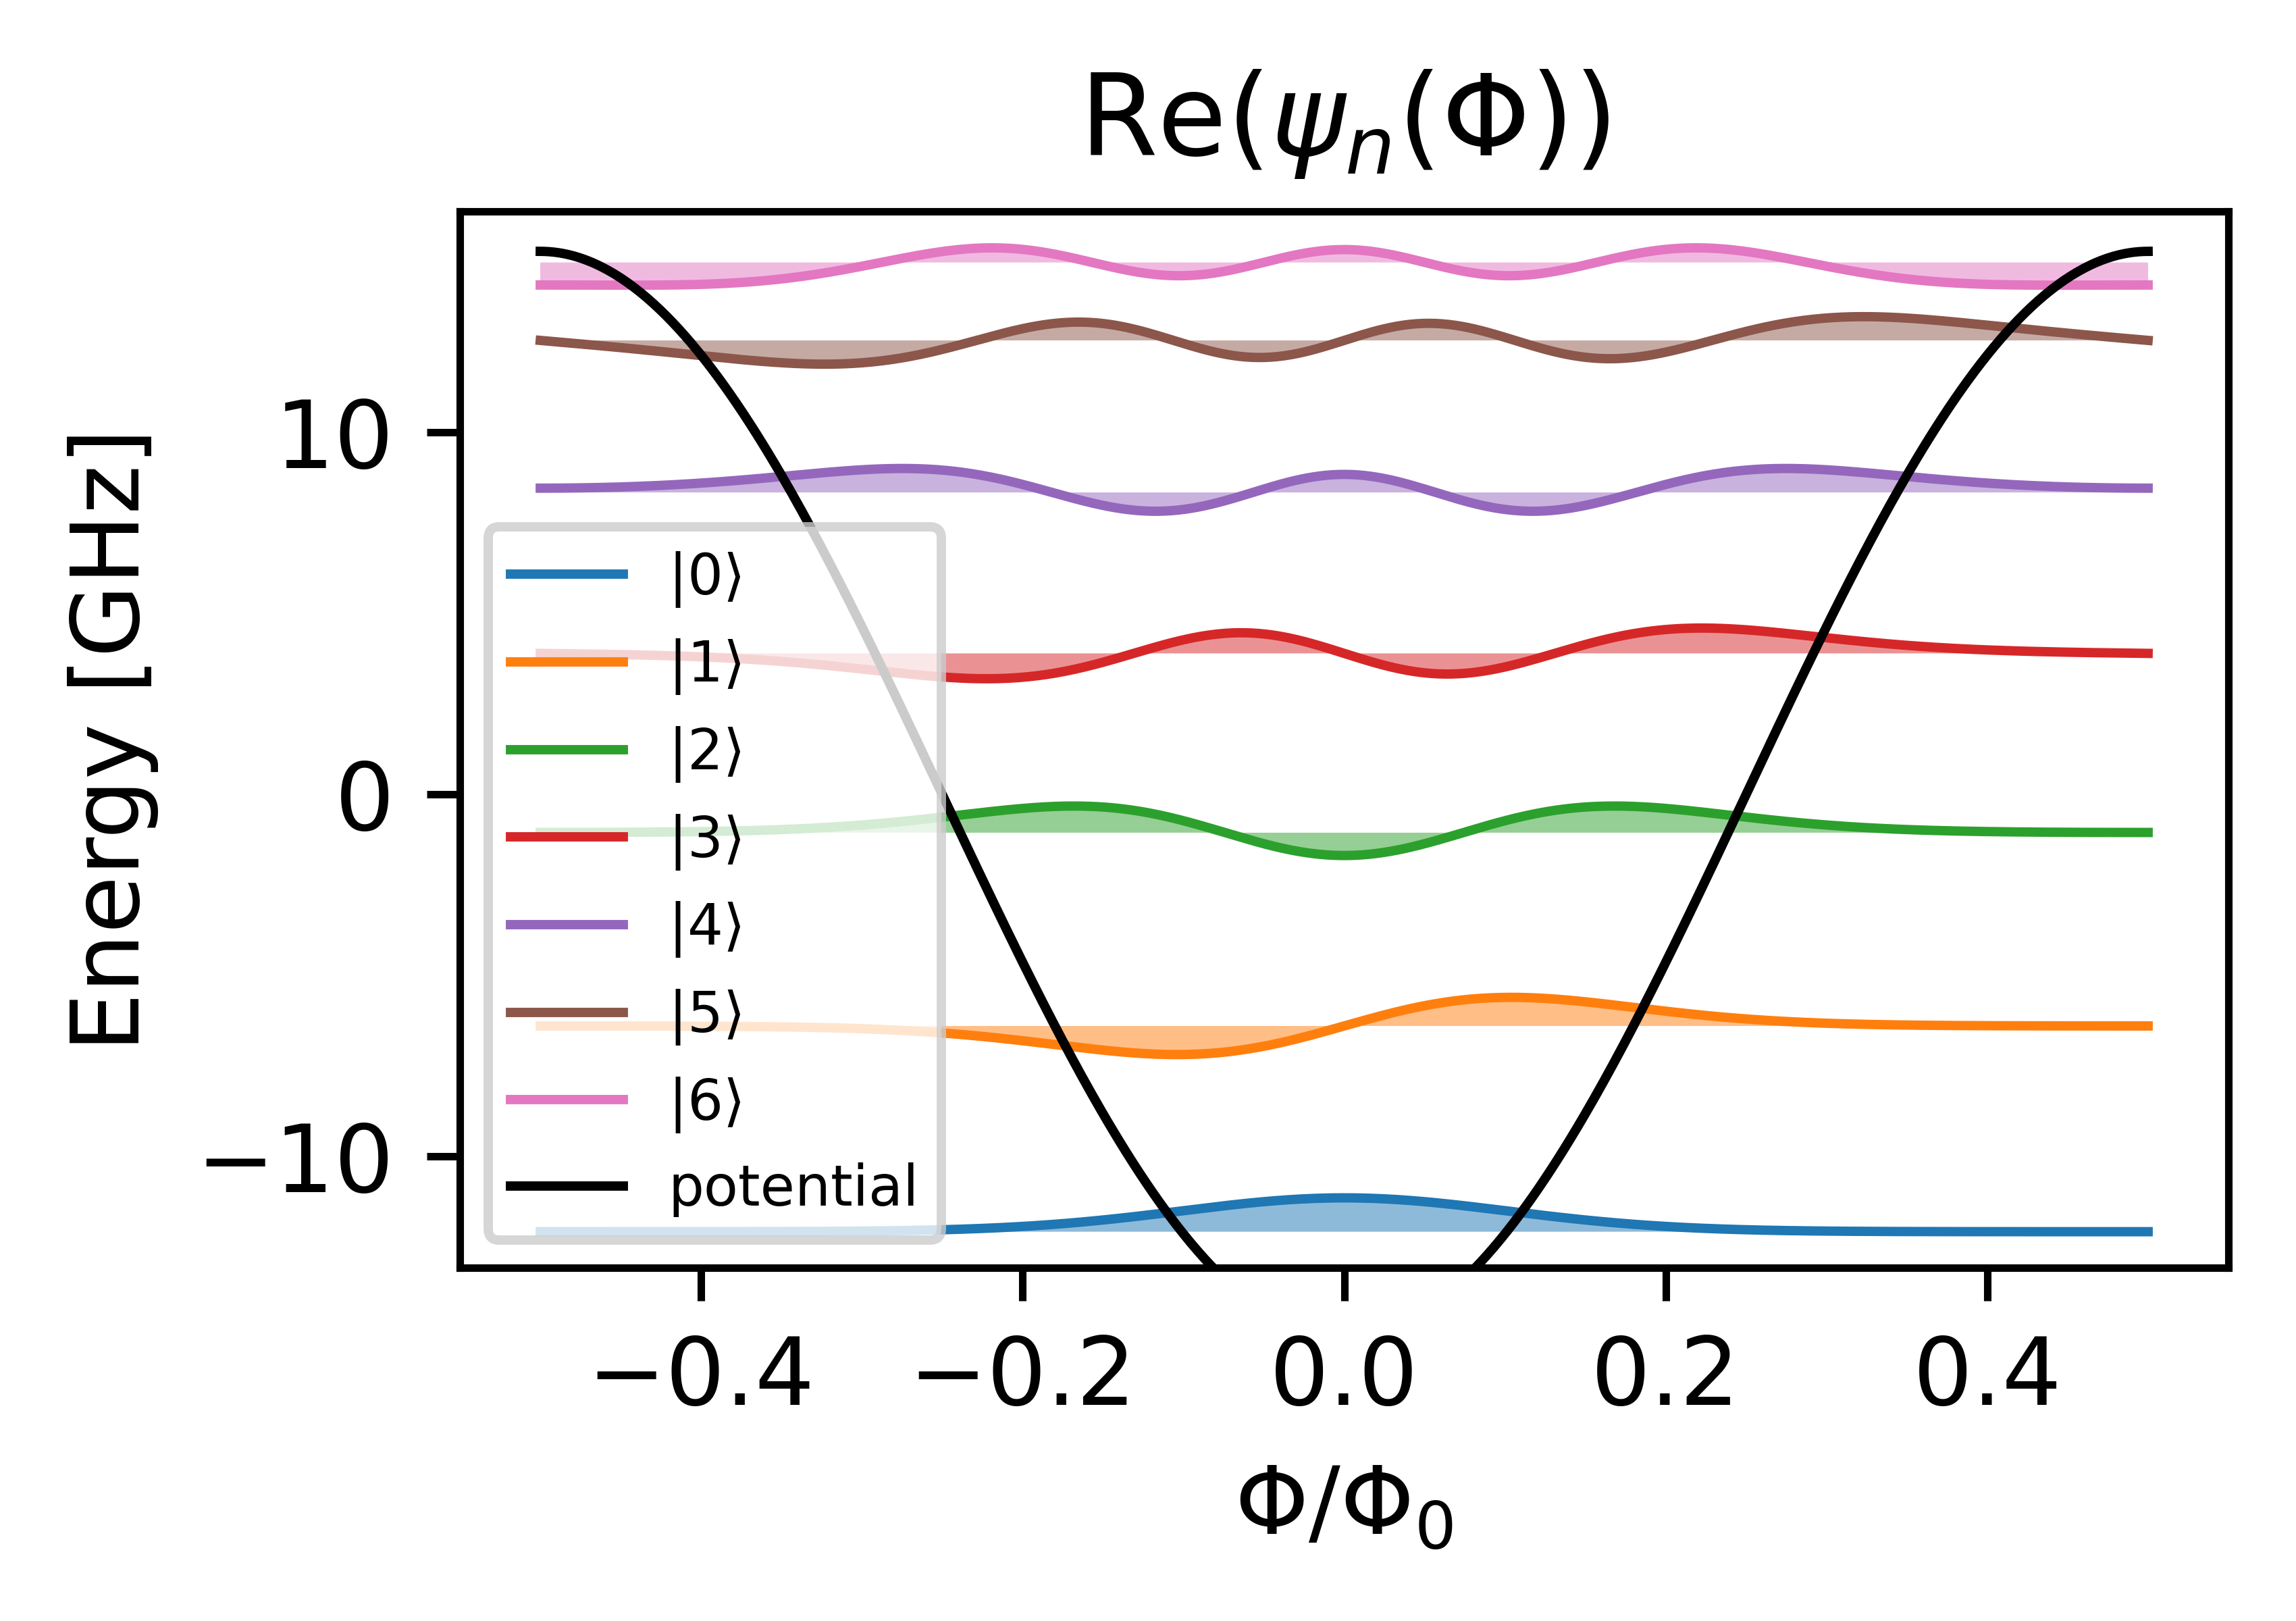

In [5]:
phi_vals = jnp.linspace(-0.5,0.5,500)
axs = qubit.plot_wavefunctions(phi_vals, max_n = 7, mode="real")

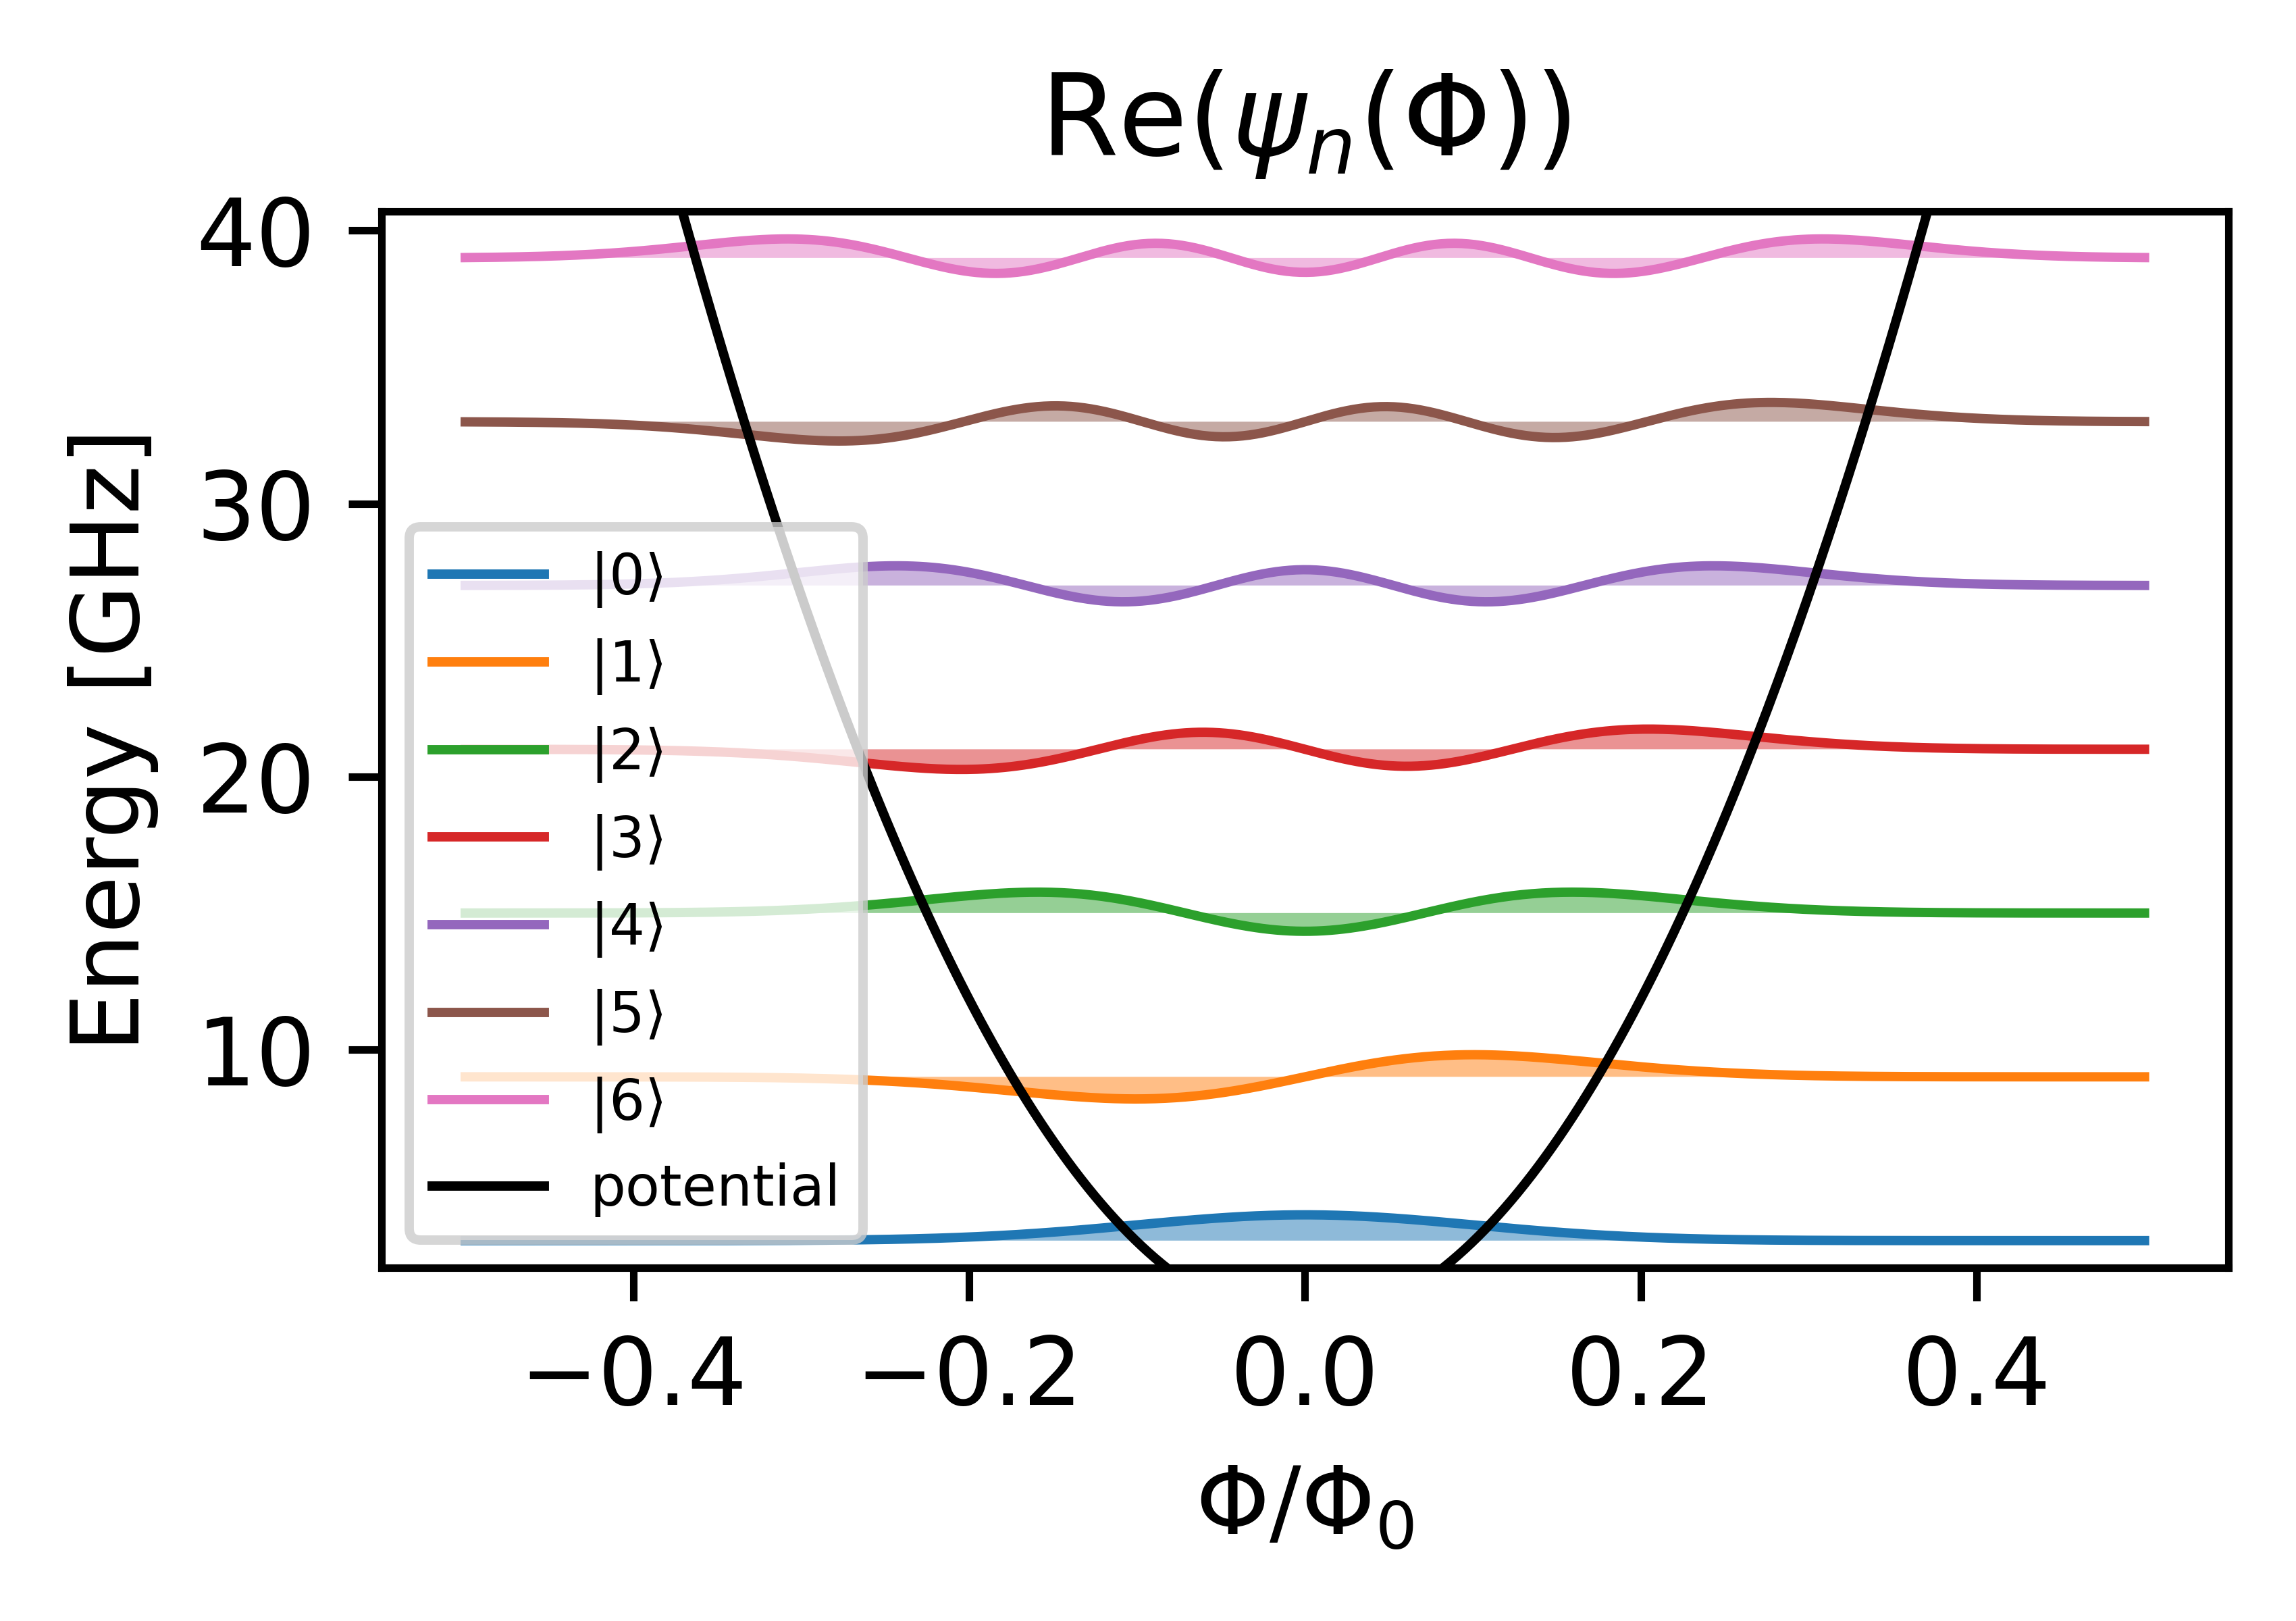

In [6]:
phi_vals = jnp.linspace(-0.5,0.5,500)
axs = res.plot_wavefunctions(phi_vals, max_n = 7, mode="real")

# 2 - Tunable Transmon with Symmetric SQUID

In [7]:
Ec_q = 0.3
Ej_q = 15

@jit
def gen_symmetric_tunable_transmon(phi_ext):
    qubit = jqtd.TunableTransmon.create(
        23,
        {"Ec": Ec_q, "Ej1": Ej_q, "Ej2": Ej_q, "phi_ext": phi_ext},
        basis=jqtd.BasisTypes.charge,
        hamiltonian=jqtd.HamiltonianTypes.full,
        N_pre_diag=23,
    )
    return qubit

@jit
def get_energies(qubit):
    Es = qubit.eig_systems["vals"]
    f_10 = Es[1]-Es[0]
    f_21 = Es[2]-Es[1]
    return f_10, f_21

In [8]:
Ec_q = 0.3
Ej_q = 15
qubit = jqtd.TunableTransmon.create(
        23,
        {"Ec": Ec_q, "Ej1": Ej_q, "Ej2": Ej_q, "phi_ext": 0.0},
        basis=jqtd.BasisTypes.charge,
        hamiltonian=jqtd.HamiltonianTypes.full,
        N_pre_diag=23,
    )
Es = qubit.eig_systems["vals"]
Es[1:] - Es[:-1]

Array([8.17354066e+00, 7.84489238e+00, 7.49184760e+00, 7.10705099e+00,
       6.68085308e+00, 6.16693090e+00, 5.72807472e+00, 4.06638120e+00,
       6.49244354e+00, 6.34643532e-01, 1.13824351e+01, 1.37551310e-02,
       1.48177239e+01, 1.07005189e-04, 1.75280857e+01, 4.17369336e-07,
       2.01663337e+01, 9.17395937e-10, 2.34983837e+01, 1.06581410e-12,
       3.10636677e+01, 5.68434189e-14], dtype=float64)

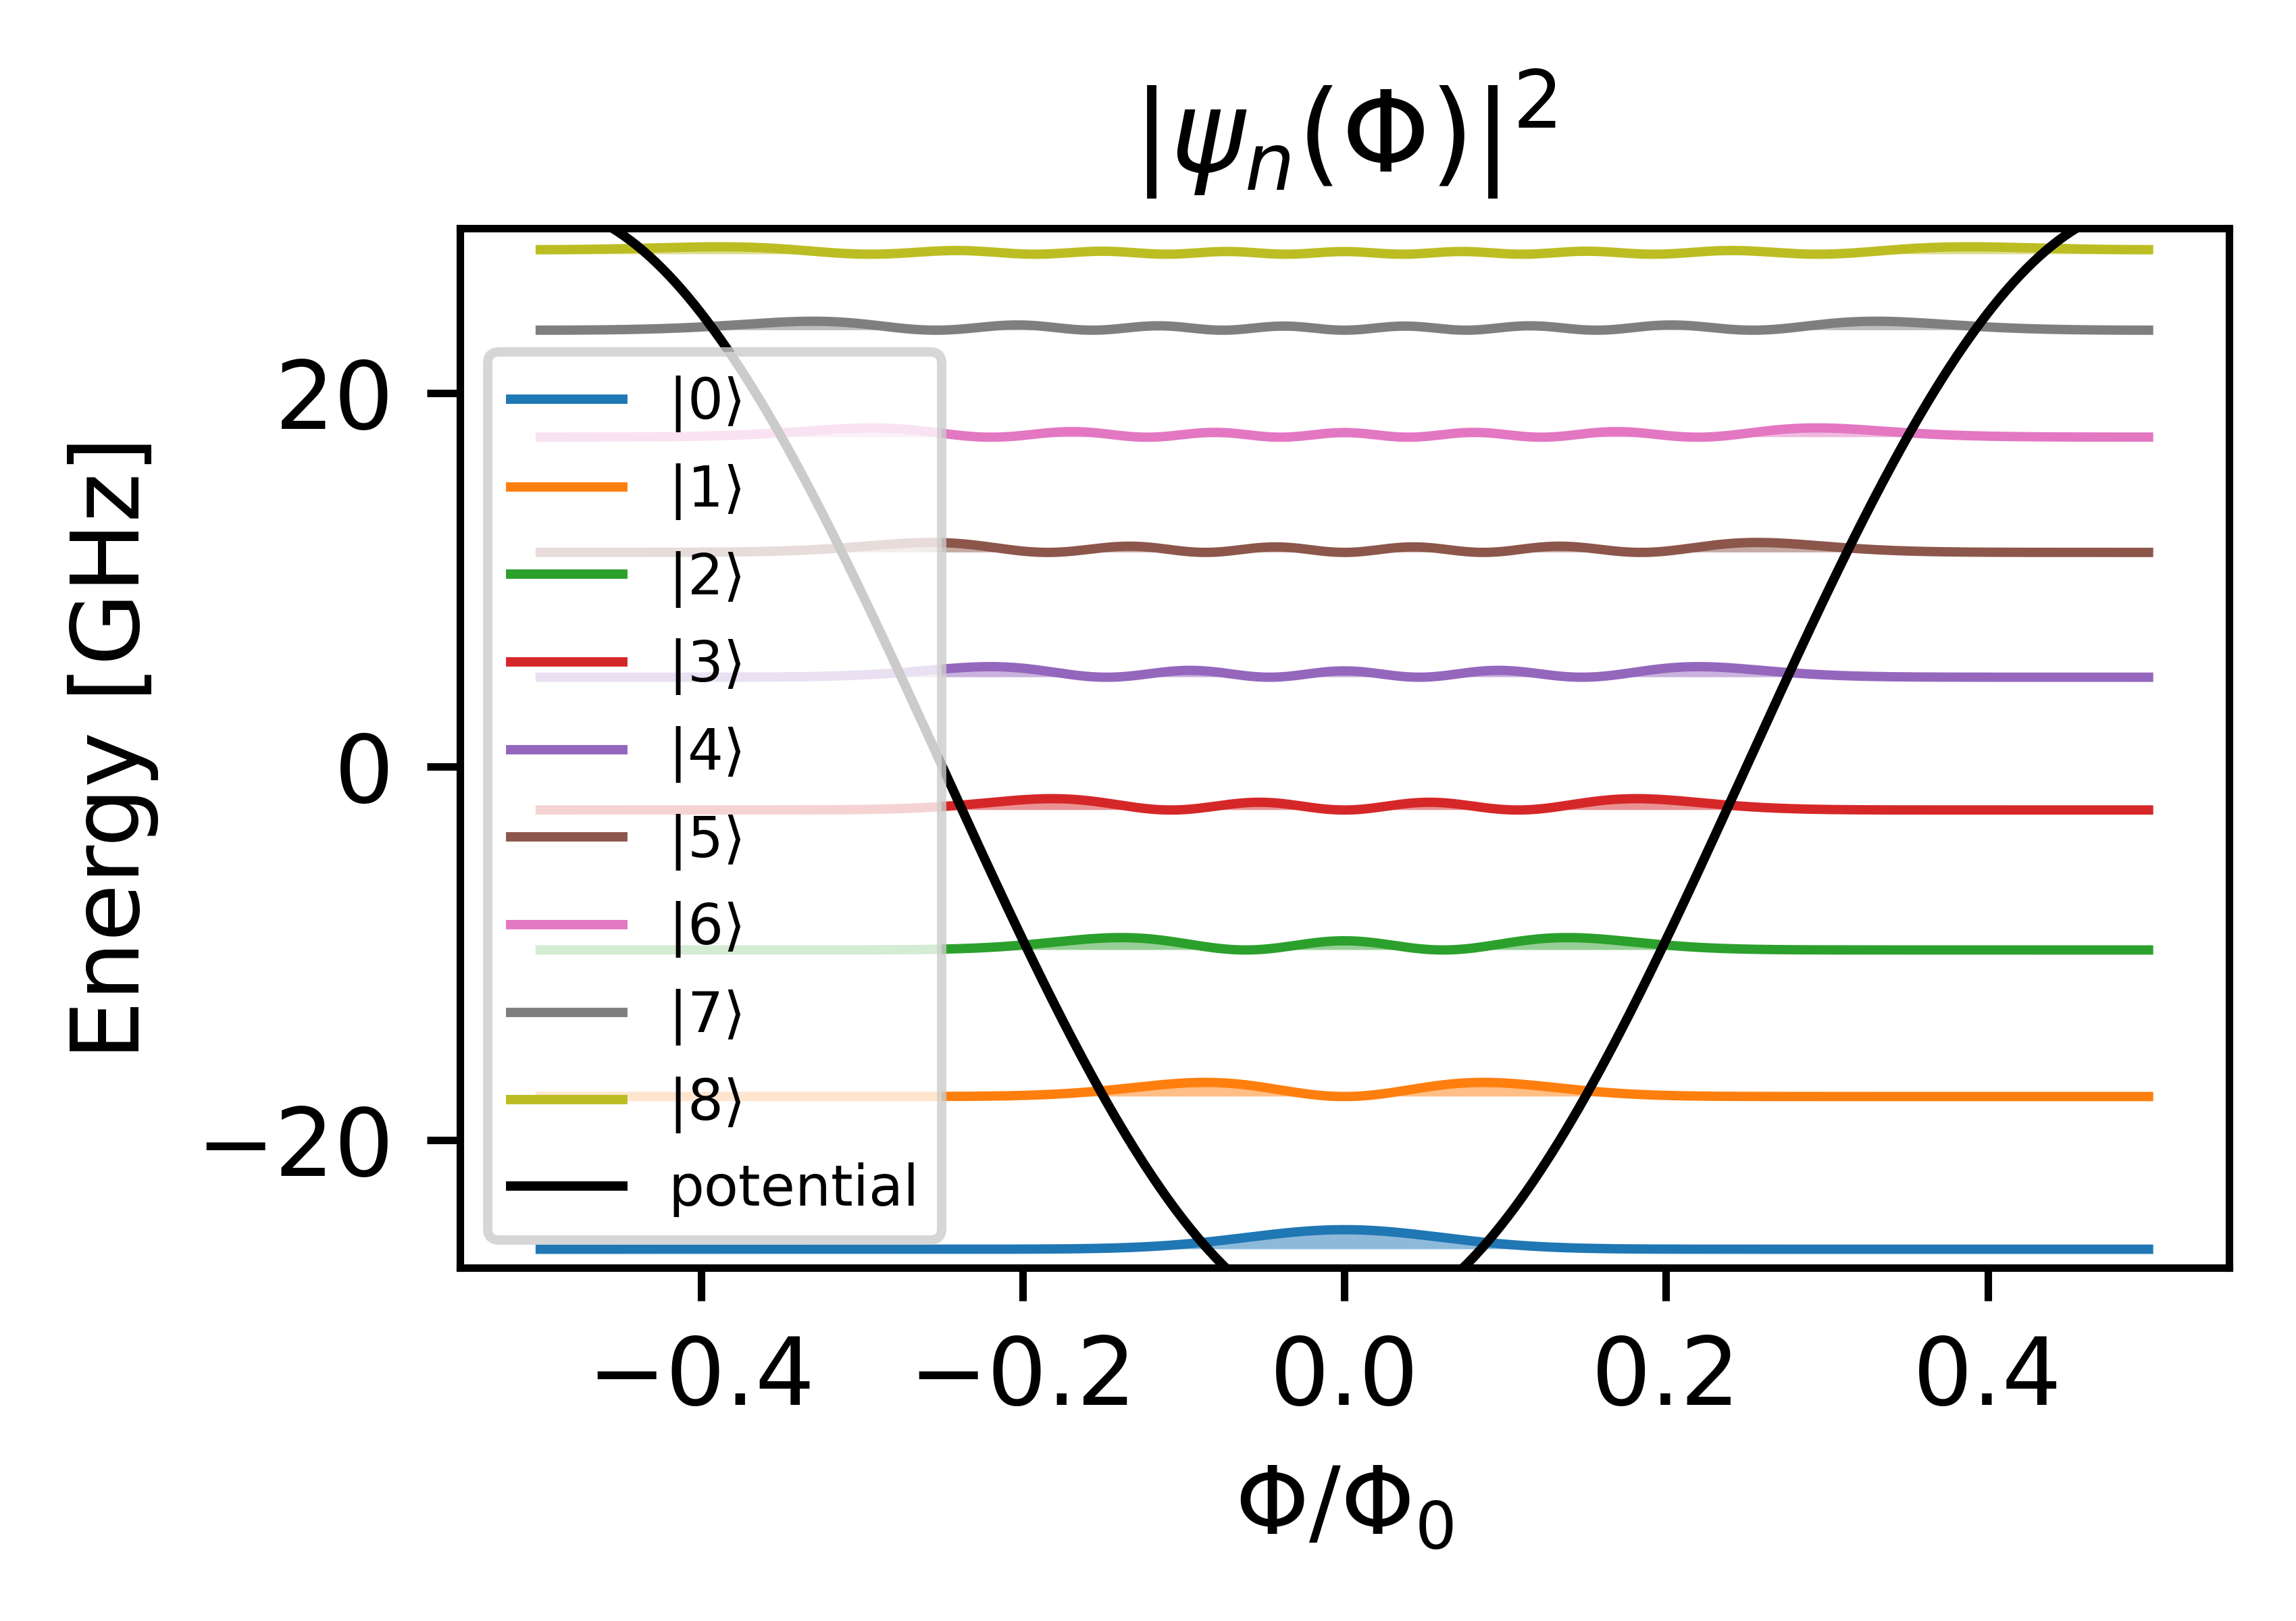

In [9]:
qubit = gen_symmetric_tunable_transmon(0.0)
phi_vals = jnp.linspace(-0.5,0.5,500)
axs = qubit.plot_wavefunctions(phi_vals,  max_n = 9)

In [10]:
phi_exts = jnp.linspace(-1,1,500)

f_10s = []
f_21s = []

for phi_ext in tqdm(phi_exts):
    qubit = gen_symmetric_tunable_transmon(phi_ext)
    f_10, f_21 = get_energies(qubit)
    f_10s.append(f_10)
    f_21s.append(f_21)

f_10s = jnp.array(f_10s)
f_21s = jnp.array(f_21s)

100%|██████████| 500/500 [00:00<00:00, 2619.01it/s]


Text(0, 0.5, 'Transition Frequency [GHz]')

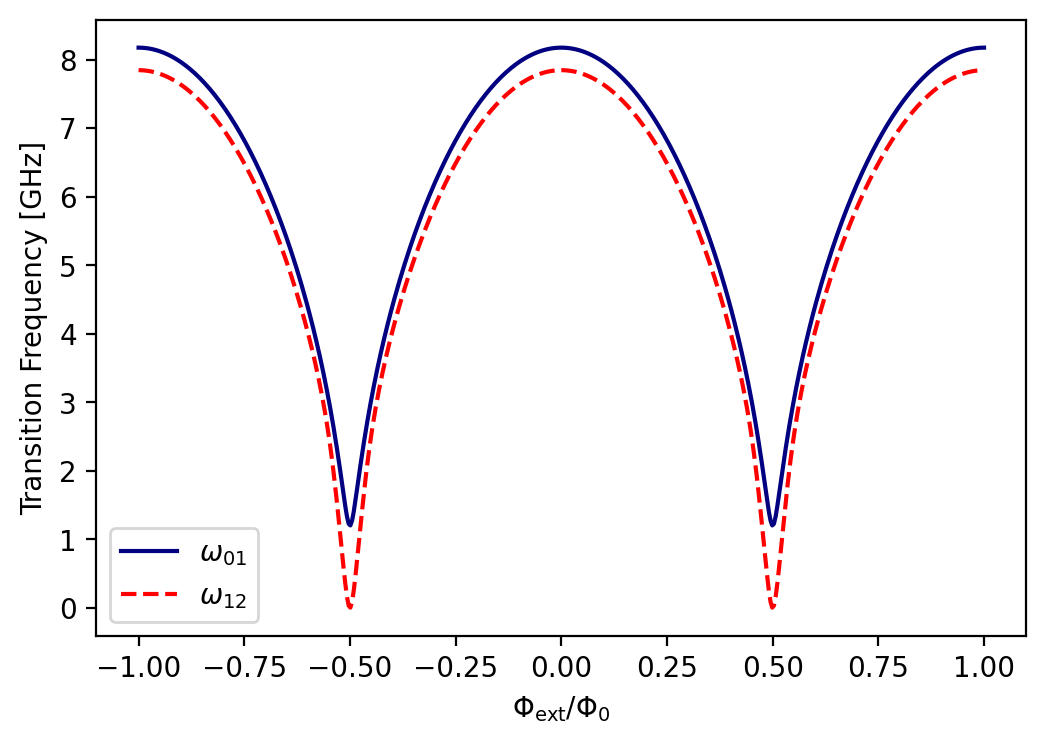

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6,4), dpi=200)
ax.plot(phi_exts, f_10s, label=r"$\omega_{01}$", color="navy")
ax.plot(phi_exts, f_21s, label=r"$\omega_{12}$", color="red", linestyle="--")
ax.set_xlabel(r"$\Phi_{\rm ext}/\Phi_0$")
ax.legend()
ax.set_ylabel(r"Transition Frequency [GHz]")

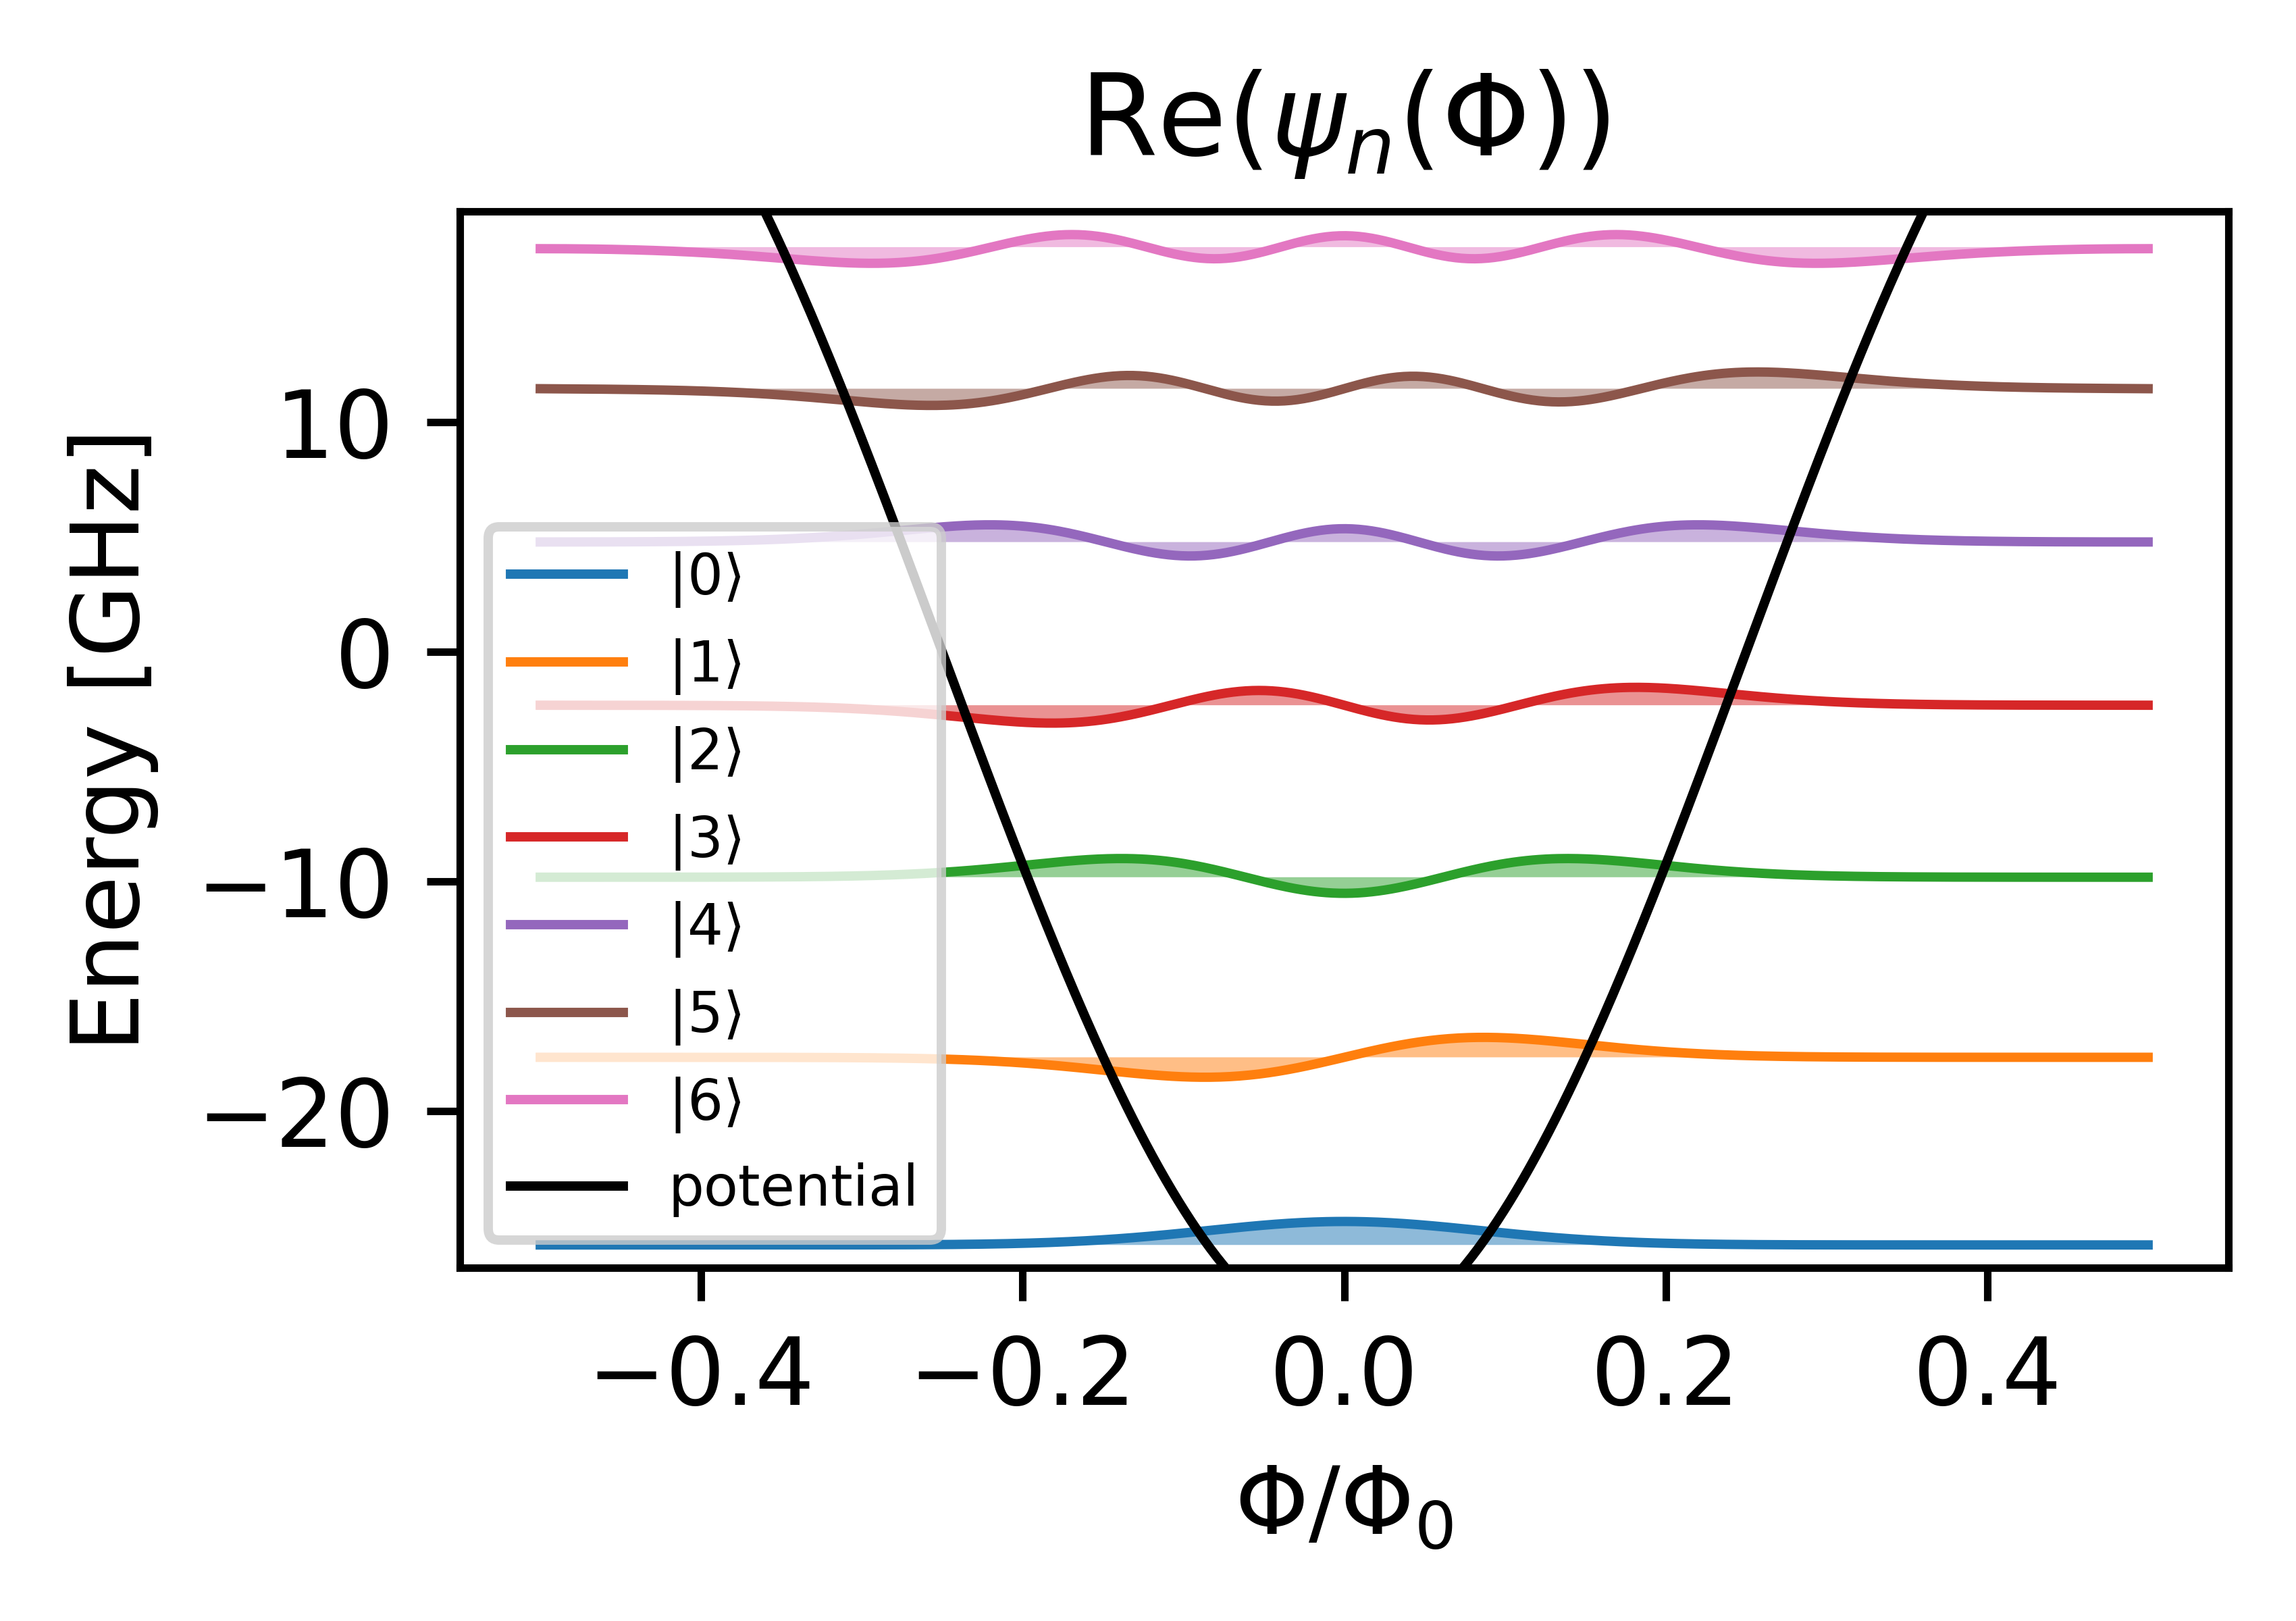

In [12]:
phi_vals = jnp.linspace(-0.5,0.5,500)
axs = qubit.plot_wavefunctions(phi_vals, max_n = 7, mode="real")